# $$Projet~d'Analyse~de~Données~Financières$$

## Introduction
Chaque jour, dans le **monde de la Bourse**, des investisseurs achètent et vendent des actions d'entreprises comme Apple, Google, ou Tesla. Le prix d'une action monte ou descend selon la confiance que les gens accordent à l'entreprise et à ses perspectives économiques. Par exemple, imaginons que l'iphone 17 vienne de sortir et fasse sensation:

 je peux prévoir une hausse du chiffre d'affaires d'Apple dans les prochains mois et décider d'acheter ses actions. 
 
 De même, si Apple augmente ses prix pour maximiser ses profits, cela pourrait renforcer la valeur de ses actions sur le marché.

Ce projet vise à construire une chaîne complète d'analyse de données financières, depuis l'importation des prix boursiers jusqu'à l'évaluation de stratégies de trading.

L'objectif est de comprendre les concepts clés -- **rendement**, **volatilité**, **risque** et **performance** -- et de les mettre en pratique grâce à une approche d'analyse quantitative en Python.

Pour comprendre comment analyser les données financières, j'ai choisi de suivre une approche progressive, comme un petit enquêteur qui veut découvrir les secrets cahés derrière les prix des actions.

## I. Importation des données boursières
Cette première étape consiste à récupérer les prix des actions directement depuis internet à l'aide de la bibliothèque Python *yfinance*. 

Cette bibliothèque permet de télécharger les données de sociétés comme Apple (AAPL), Tesla (TSLA) ou Microsoft (MSFT) depuis *Yahoo Finance*. 

In [ ]:
pip install yfinance 

In [5]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

>Un ticker est un symbole boursier utilisé pour identifier une action ou un actif en bourse.

Ainsi, grâce à la commande *yf.download()*, j'obtiens un **DataFrame** sur les prix de l'action Apple sur la période du **2018-01-01** au **2024-12-31** contenant les colonnes:
* **Close:** Prix de clôture
* **High:** Prix le plus haut de la journée
* **Low:** Prix le plus bas de la journée
* **Open:** Prix d'ouverture de la journée
* **Volume:** Nombre d'actions échangées

In [6]:
ticker = "AAPL"

data = yf.download(ticker, start="2018-01-01", end="2024-12-31")

data.head()

/var/folders/z0/jplkpm8d2t75rs5ty15p0b_m0000gn/T/ipykernel_1239/1896276349.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2018-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.380993,40.390372,39.677736,39.888715,102223600
2018-01-03,40.373959,40.917812,40.310668,40.444285,118071600
2018-01-04,40.561497,40.664642,40.338800,40.446630,89738400
2018-01-05,41.023315,41.110049,40.566199,40.657622,94640000
2018-01-08,40.870937,41.166304,40.772478,40.870937,82271200


Affichons à présent l'évolution du prix de clôture dans le temps:

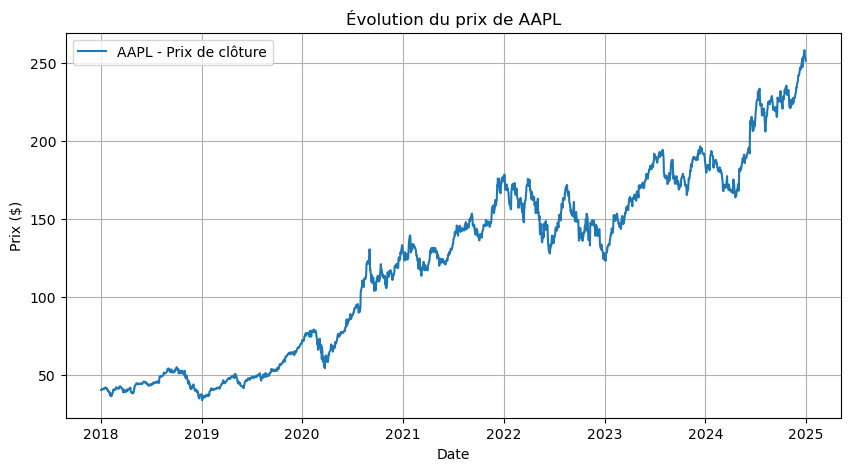

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data["Close"], label=f"{ticker} - Prix de clôture")
plt.title(f"Évolution du prix de {ticker}")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.legend()
plt.grid(True)
plt.show()

Ce grphique montre le prix de clôture de l'action jour après jour. L'entreprise Apple étant en croissance, on a une tendance ascendante.

Les pics correspondent à des annonces, des crises ou des événements économiques. Par exemple, un effondrement est visible en 2020 (COVID), puis une reprise jusqu'en 2024.

## II. Calcul des indicateurs de performance et de risque
L'objectif de cette partie est de mesurer si une action rapporte de l'argent, et à quel point elle est risquée.

Car en Bourse, gagner plus signifie souvent prendre plus de risques.

### 1. Le rendement journalier
C'est le pourcentage de variation du prix d'un actif d'un jour à l'autre. Il permet de mesurer si une action rapporte ou perd de la valeur chaque jour et se calcule par la formule: $$R_{t}=\frac{P_{t}-P_{t-1}}{P_{t-1}}$$


> *pct_change()* calcule le rendement journalier en utilisant la formule ci-dessus.

In [8]:
data['Return'] = data['Close'].pct_change()
data.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2018-01-02,40.380993,40.390372,39.677736,39.888715,102223600,NaN
2018-01-03,40.373959,40.917812,40.310668,40.444285,118071600,-0.000174
2018-01-04,40.561497,40.664642,40.338800,40.446630,89738400,0.004645
2018-01-05,41.023315,41.110049,40.566199,40.657622,94640000,0.011386
2018-01-08,40.870937,41.166304,40.772478,40.870937,82271200,-0.003714


La colonne **Return** des rendements est essentielle pour comparer les performances de plusieurs actions.

### 2. Le rendement annuel
Le rendement moyen indique combien rapporte une action en moyenne sur une période donnée. 

Et comme les investisseurs préfèrent souvent raisonner à l'année plutôt qu'au jour le jour, on "annualise" les indicateurs pour pouvoir comparer les actions. $$\bar{R}_{annuel} \approx \bar{R}_{jounalier} \times 252$$

> jours de marché par an = 252

In [9]:
mean_daily_return = data['Return'].mean()
annual_return = mean_daily_return * 252  # 252 jours boursiers/an
print(f"Rendement annuel moyen: "f"{annual_return:.2%}")

Rendement annuel moyen: 30.87%


### 3. La volatilité annuelle
La volatilité est l'écart-type des rendements. Elle mesure les mouvements du prix:
* Si le prix monte et descend souvent, la volatilité est élevée (donc le risque aussi).

* Une action très stable aura une faible volatilité. 

En finance:

* **Haute volatilité** = plus de risque (mais aussi plus d'opportunités)

* **Basse volatilité** = plus de stabilité.

In [10]:
daily_volatility = data['Return'].std()
annual_volatility = daily_volatility * np.sqrt(252)
print(f"V olatilité annuelle: "f"{annual_volatility:.2%}")

V olatilité annuelle: 30.55%


### 4. Le rendement cumulé
Le rendement cumulé montre combien un investissement aurait rapporté au total si on l'avait gardé sur toute la période.

C'est un peu comme regarder la somme de tous les petits gains et pertes journaliers.

Il répond à la question: "Si j'avais investi 1€ au début, combien vaudrait-il aujourd'hui ?"

In [11]:
data['Cumulative Return'] = (1 + data['Return']).cumprod() - 1
cumulative_return = data['Cumulative Return'].iloc[-1]
print(f"Rendement cumulé: "f"{cumulative_return:.2%}")

Rendement cumulé: 522.34%


### 5. Le Ratio de Sharpe
Deux actions peuvent avoir le même rendement moyen. Mais si l'une varie très fortement chaque jour, elle sera plus risquée. 

Le ratio de Sharpe aide à choisir la plus stable et rentable, il indique si rendement obtenu vaut la peine par rapport au risque pris. La formule du ratio de Sharpe est: $$ Sharpe=\frac{Rendement_{annuel}-Taux~sans~risque}{Volatilité}$$

>Le taux sans risque annuel (comme celui d'un livret ou d'une obligation d'État) est souvent proche de 2%.

* **Sharpe > 1**= bon investissement

* **Sharpe > 2**= très bon

* **Sharpe < 1**= risque élevé pour peu de gain

In [12]:
risk_free_rate = 0.02
sharpe_ratio = (annual_return - risk_free_rate)/ annual_volatility
print(f"Ratio de Sharpe: "f"{sharpe_ratio:.2%}")


Ratio de Sharpe: 94.50%


### 6. Maximum Drawdown
Le MDD mesure la plus grande chute qu'un portefeuille a suvie depuis un sommet historique jusqu'à un creux. 
Autrement dit, c'est la pire baisse d'un capital avant qu'il ne recommence à monter.

Il est très utile pour évaluer la solidité d'une stratégie: deux portefeuille peuvent avoir le même rendement, mais l'un peut être plus confortable à détenir que l'autre.

> *drawdown.min()* donne la pire chute.

In [13]:
cumulative = (1 + data['Return']).cumprod()
rolling_max = cumulative.cummax()
drawdown = (cumulative - rolling_max) / rolling_max
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: "f"{max_drawdown:.2%}")


Maximum Drawdown: -38.52%


In [14]:
# ---- Résumé des résultats ----
indicators = {
    "Rendement annuel moyen": f"{annual_return:.2%}",
    "Volatilité annuelle": f"{annual_volatility:.2%}",
    "Rendement cumulé": f"{cumulative_return:.2%}",
    "Ratio de Sharpe": f"{sharpe_ratio:.2f}",
    "Maximum Drawdown": f"{max_drawdown:.2%}"
}

# Affichage
print(f"Indicateurs de performance pour {ticker} :\n")
for key, value in indicators.items():
    print(f"{key:<30}: {value}")

Indicateurs de performance pour AAPL :

Rendement annuel moyen        : 30.87%
Volatilité annuelle           : 30.55%
Rendement cumulé              : 522.34%
Ratio de Sharpe               : 0.95
Maximum Drawdown              : -38.52%


## III. Visualisation et Interprétation
Les visualisations aident à voir les tendances, repérer les périodes de crise et interprétrer le comportement du marché.

### 1. Rendements journaliers 
Ce graphique montre les variations quotidiennes du prix. 

C'est utile pour visualiser la volatilité (instabilité des rendements)

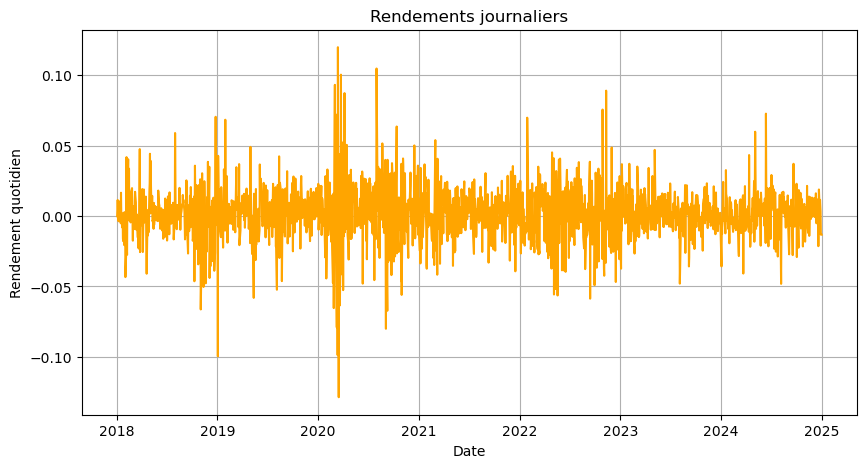

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(data['Return'], color='orange')
plt.title('Rendements journaliers')
plt.xlabel('Date')
plt.ylabel('Rendement quotidien')
plt.grid(True)
plt.show()


### 2. Rendement cumulé
Ce graphique montre la performance totale du titre depuis le début de la période. 

C'est l'un des plus importants pour un investisseur, car il illustre la croissance de l'investissement dans le temps.

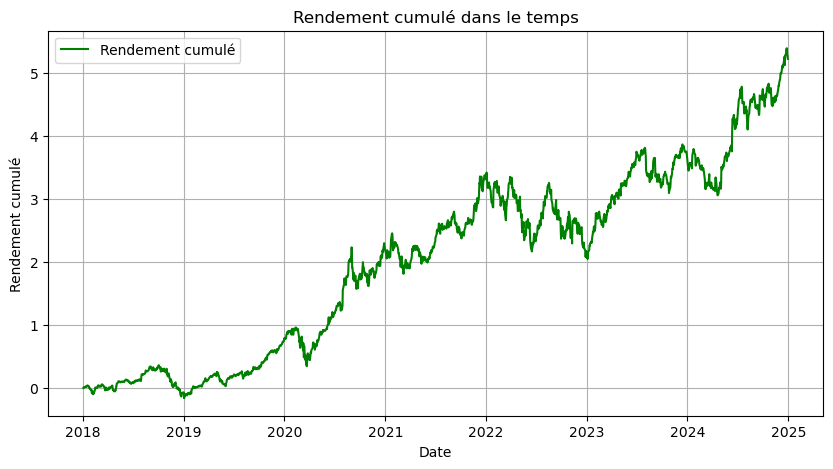

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(data['Cumulative Return'], label='Rendement cumulé', color='green')
plt.title('Rendement cumulé dans le temps')
plt.xlabel('Date')
plt.ylabel('Rendement cumulé')
plt.legend()
plt.grid(True)
plt.show()

La courbe montre la croissance d'un investissement de 1$. On voit que pour quelqu'un qui a investi en 2018, son capital double en 2020.

### 3. Maximum Drawdown (périodes de chute)
Le graphique permet de repérer les moments où le portefeuille a subi les plus fortes pertes avant de remonter.

C'est une mesure très importante pour les traders professionnel: ils veulent éviter les stratégies avec de grandes baisses.

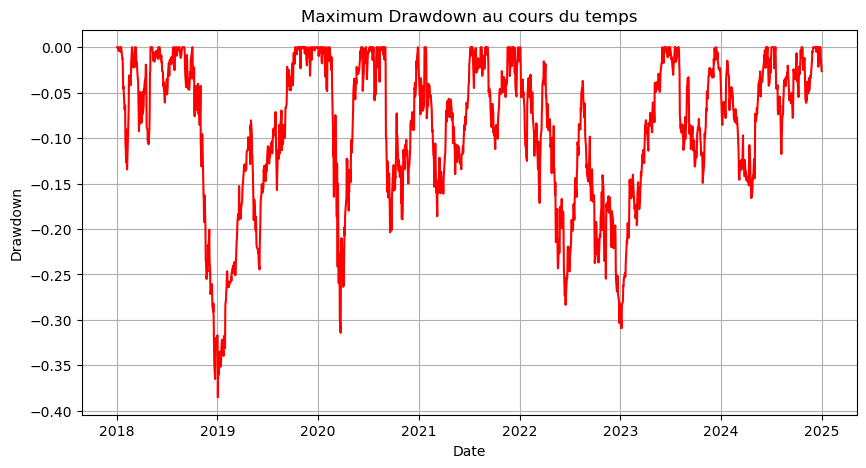

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(drawdown, color='red')
plt.title('Maximum Drawdown au cours du temps')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

## IV. backtesting d'une stratégie simple
Dans cette partie, je vais tester une stratégie de trading simple pour observer comment elles auraient performé dans le passé, en utilisant les données historiques.

Le backtesting consiste à simuler une stratégie (par exemple, acheter quand le prix monte au-dessus de sa moyenne mobile, vendre sinon) sur des données historiques. 

Cela permet de voir si la stratégie aurait généré un profit ou une perte, et d'évaluer sa robustesse face au risque.

### 1. Stratégie des moyennes mobiles (Moving Average Strategy)
C'est une stratégie classique et intuitive, souvent utilisée pour suivre la tendance du marché.

Le principe est simple; on calcule deux moyennes du prix:

Une moyenne mobile courte (par exemple sur 20 jours): réagit vite aux changements de prix;

Une moyenne mobile longue (par exemple sur 50 jours): montre la tendance générale.

Quand la moyenne courte dépasse la longue, c'est signal de hausse: Acheter 

Par contre, quand la moyenne courte passe en dessous, c'est un signal de baisse: Vendre

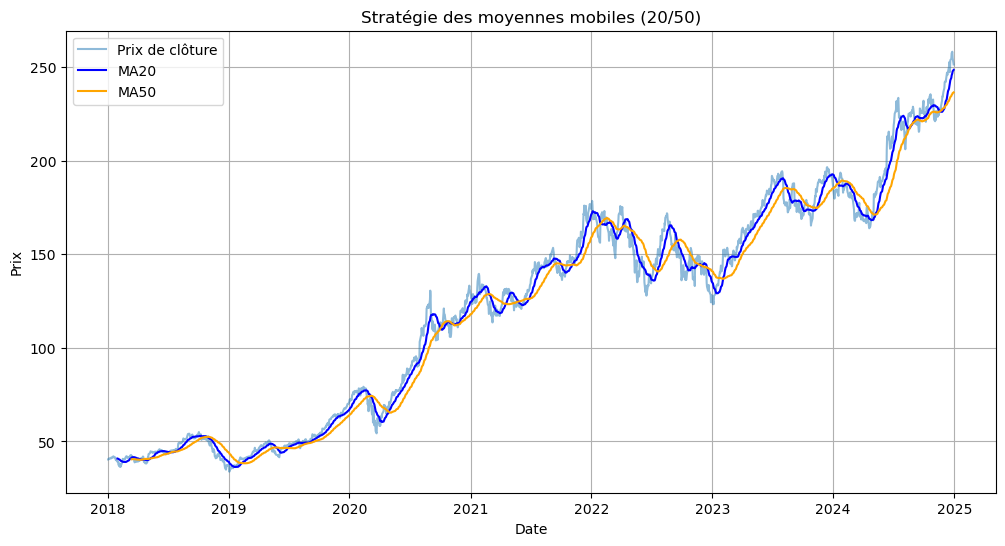

In [18]:
# Création des moyennes mobiles
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Génération des signaux d'achat et de vente
data['Signal'] = 0
data.loc[data['MA20'] > data['MA50'], 'Signal'] = 1
data.loc[data['MA20'] < data['MA50'], 'Signal'] = -1

# Visualisation des signaux
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Prix de clôture', alpha=0.5)
plt.plot(data['MA20'], label='MA20', color='blue')
plt.plot(data['MA50'], label='MA50', color='orange')
plt.title("Stratégie des moyennes mobiles (20/50)")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)
plt.show()


Quand la MA20 (bleue) croise la MA50 (orange) vers le haut, c'est un signal d'achat.

Quand elle la croise vers le bas, c'est un signal de vente.

Ces croisements sont appelés Golden Cross (achat) et Death Cross (vente)

### 2. Simulation du portefeuille
Simulons un portefeuille qui:

achète quand le signal = -1

vend (ou reste hors marché) quand le signal = -1

Et ensuite, observons l'évolution du capital comme si on avait réellement suivi la stratégie.

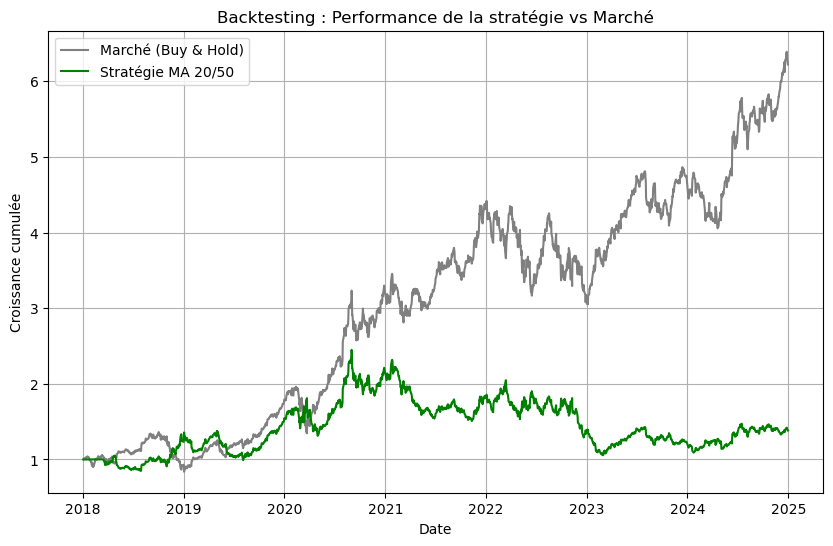

In [19]:
# Rendement de la stratégie
data['Strategy Return'] = data['Signal'].shift(1) * data['Return']

# Rendement cumulé de la stratégie et du marché
data['Cumulative Market Return'] = (1 + data['Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()

# Visualisation
plt.figure(figsize=(10,6))
plt.plot(data['Cumulative Market Return'], label='Marché (Buy & Hold)', color='gray')
plt.plot(data['Cumulative Strategy Return'], label='Stratégie MA 20/50', color='green')
plt.title('Backtesting : Performance de la stratégie vs Marché')
plt.xlabel('Date')
plt.ylabel('Croissance cumulée')
plt.legend()
plt.grid(True)
plt.show()


Quand la courbe verte (stratégie) est au-dessus de la grise (marché), la stratégie bat le marché.

Et quand elle est en dessous, la stratégie n'apporte pas de valeur ajoutée.

Cette comparison est essentielle pour savoir si l'approche vaut la peine d'être utilisée.

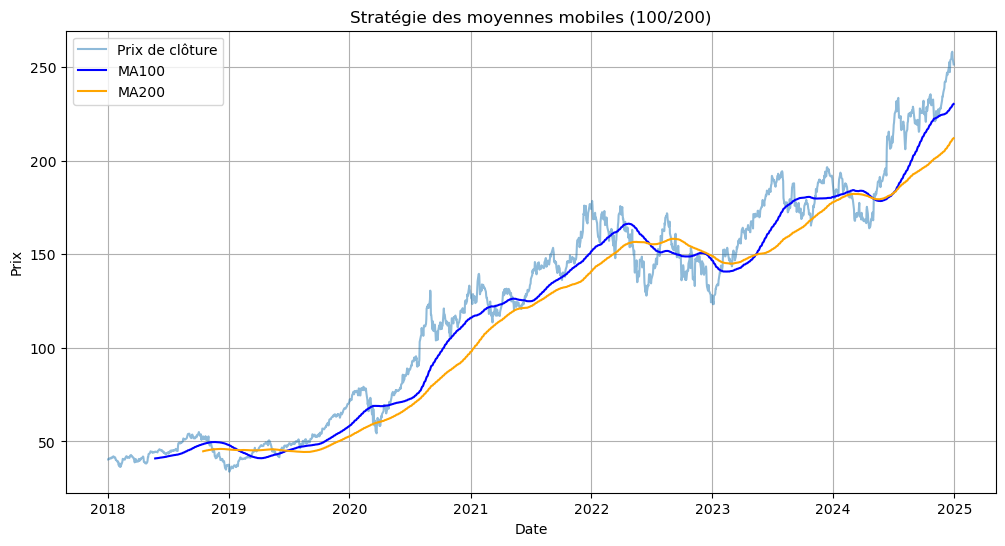

In [20]:
# Création des moyennes mobiles
data['MA100'] = data['Close'].rolling(window=100).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Génération des signaux d'achat et de vente
data['Signal2'] = 0
data.loc[data['MA100'] > data['MA200'], 'Signal2'] = 1
data.loc[data['MA100'] < data['MA200'], 'Signal2'] = -1

# Visualisation des signaux
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Prix de clôture', alpha=0.5)
plt.plot(data['MA100'], label='MA100', color='blue')
plt.plot(data['MA200'], label='MA200', color='orange')
plt.title("Stratégie des moyennes mobiles (100/200)")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)
plt.show()


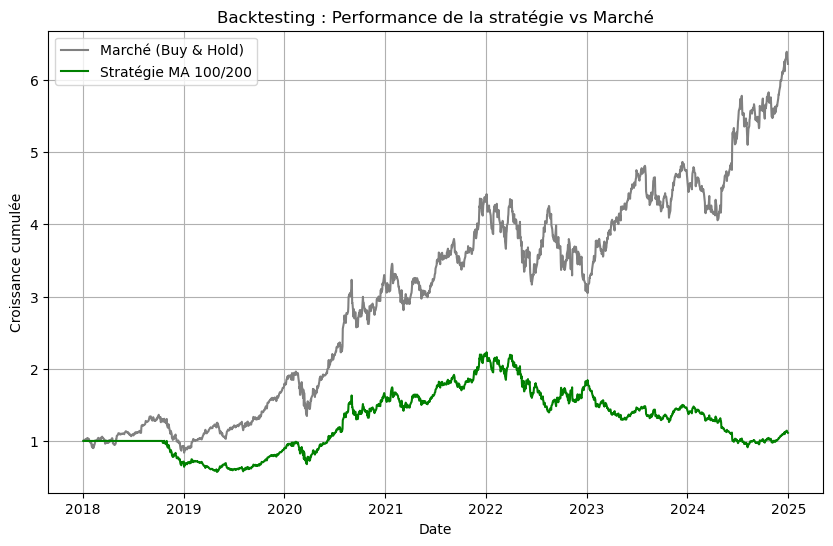

In [21]:
# Rendement de la stratégie
data['Strategy Return2'] = data['Signal2'].shift(1) * data['Return']

# Rendement cumulé de la stratégie et du marché
#data['Cumulative Market Return'] = (1 + data['Return']).cumprod()
data['Cumulative Strategy Return2'] = (1 + data['Strategy Return2']).cumprod()

# Visualisation
plt.figure(figsize=(10,6))
plt.plot(data['Cumulative Market Return'], label='Marché (Buy & Hold)', color='gray')
plt.plot(data['Cumulative Strategy Return2'], label='Stratégie MA 100/200', color='green')
plt.title('Backtesting : Performance de la stratégie vs Marché')
plt.xlabel('Date')
plt.ylabel('Croissance cumulée')
plt.legend()
plt.grid(True)
plt.show()

### 3. Évaluation de la stratégie
Une fois la simulation terminée, on calcule les mêmes indicateurs de performance que précédemment: 

rendement annualisé

volatilité

ratio Sharpe

drawdown

In [23]:
strategy_daily_return = data['Strategy Return'].dropna()

avg_return_strategy = strategy_daily_return.mean()
vol_strategy = strategy_daily_return.std()

annual_return_strategy = avg_return_strategy * 252
annual_vol_strategy = vol_strategy * (252 ** 0.5)
sharpe_strategy = (annual_return_strategy - 0.02) / annual_vol_strategy

# Maximum Drawdown
cumulative_strategy = (1 + strategy_daily_return).cumprod()
rolling_max_strategy = cumulative_strategy.cummax()
drawdown_strategy = cumulative_strategy / rolling_max_strategy - 1
max_drawdown_strategy = drawdown_strategy.min()

print("📊 Évaluation de la stratégie :")
print(f"Rendement annualisé : {annual_return_strategy*100:.2f}%")
print(f"Volatilité annualisée : {annual_vol_strategy*100:.2f}%")
print(f"Ratio de Sharpe : {sharpe_strategy:.2f}")
print(f"Maximum Drawdown : {max_drawdown_strategy*100:.2f}%")


📊 Évaluation de la stratégie :
Rendement annualisé : 9.24%
Volatilité annualisée : 30.32%
Ratio de Sharpe : 0.24
Maximum Drawdown : -56.89%


## Conclusion
Grâce à ce projet, j'ai étudié la performance d'un actif financier à travers une analyse quantitative complète.

Après avoir importé et visualisé les données historiques, j'ai calculé les principaux indicateurs de risque et de performance: rendement, volatilité, ratio de Sharpe et drawdown.

Ces mesures ont permis de caractériser le comportement de l'actif étudié sur la période considérée.

J'ai aussi implémenté et testé une stratégie de trading basée sur les moyennes mobiles (MA20 et MA50).

Cette approche simple mais populaire permet d'illustrer le concept de suivi de tendance:

l'investisseur cherche à acheter en phase haussière et à vendre en phase baissière.

Le backtesting a permis de simuler les résultats de la stratégie sur données passées, de comparer sa performance à cell d'une stratégie passive ("buy & hold), et d'en évaluer la robustesse à l'aide d'indicateurs de rendement annualisé, de volatilité, de ratio de Sharpe et de maximum drawdown.

Les résultats obtenus montrent que la stratégie peut, selon les périodes, surperformer ou sous-performer le marché.

Elle est généralement plus efficace sur des marchés tendanciels, mais moins performante en périodes de forte volatilité ou de stagnation, où les signaux se contredisent rapidement (effet “whipsaw”).

Les principales limites du travail résident dans :
la simplicité du modèle, qui ne tient pas compte des coûts de transaction ni du risque de liquidité,

l’absence d’optimisation automatique des paramètres (tailles de fenêtre, seuils de décision),

et le fait que les données passées ne garantissent pas les performances futures.

Plusieurs pistes d’amélioration peuvent être envisagées :

intégrer d’autres indicateurs techniques (RSI, MACD, bandes de Bollinger, etc.),

tester des stratégies multi-actifs (diversification du portefeuille),

ou appliquer des méthodes d’apprentissage automatique pour optimiser les signaux d’achat et de vente.

Enfin, une extension naturelle du projet consisterait à comparer plusieurs stratégies quantitatives afin d’identifier celles qui offrent le meilleur compromis entre rendement et risque, selon différents contextes de marché.